# Visualização de Dados com o R 

UFSCar Lagoa do Sino \
Prof. Dr. Iuri Emmanuel de Paula Ferreira \
Contato: iuri@ufscar.br \
Data: 09 de agosto de 2022



Colaboração: \
Centro de Modelagem Estatística em Ciências Ambientais (Ce-MECA - UFSCar)

e

Projeto de extensão "Data Science na Lagoa do Sino: estruturação do conhecimento e aplicações tecnológicas".



## Sumário

- [ ] Descrições univariadas
  - [X] Gráfico de barras (ou colunas)
  - [X] Gráfico de setores 
  - [ ] Tabela de frequências 
  - [ ] Diagrama de caixas
  - [ ] Histograma
  - [ ] Densidade estimada
  - [ ] Gráfico de ramos-e-folhas 
- [ ] Descrições bivariadas 
  - [ ] Tabela de Contingência
  - [ ] Gráficos de Barras / Colunas
  - [ ] Diagrama de Caixas
  - [ ] Gráfico de médias 
  - [ ] Diagrama de dispersão
- [ ] Desafios

## Sobre o Banco de dados

Nesta etapa, será usado o banco de dados `mtcars` disponível como exemplo no sistema R. Informações detalhadas a respeito deste banco de dados podem ser encontradas [aqui](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars).  




### Preparação

In [ ]:
# Carregando a extensão que converte R em Python
%load_ext rpy2.ipython

In [ ]:
# Carregando o banco de dados de exemplo
%%R
data(mtcars)
head(mtcars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


### Distribuições Univariadas

A variável `cyl` é o número de cilindros que cada modelo de carro apresenta no banco de dados. 

Para acessar esta variável individualmente, na forma de `vetor`, basta usar o comando `mtcars$cyl`.  


#### Gráfico de barras

Gráficos de barras e colunas são úteis para explorar a distribuição de frequências de variáveis categóricas, nominais ou ordinais, mas também podem ser usados para variáveis quantitativas discretas quando há poucos resultados possíveis (ex.: número de gols por partida do meu time no Campeonato Brasileiro).

O primeiro gráfico de barras do qual se tem notícia foi publicado em [Exports and Imports of Scotland to and from different parts for one Year from Christmas 1780 to Christmas 1781](https://commons.wikimedia.org/wiki/File:Playfair_Barchart.gif), cujo autor é Willian Playfair.

O primeiro passo para a construção de um gráfico de barras ou colunas é o cálculo das frequências (absolutas ou relativas).


In [ ]:
%%R
# frequências absolutas
table( mtcars$cyl ) 


 4  6  8 
11  7 14 


In [ ]:
%%R 
# frequências relativas
prop.table( table(mtcars$cyl) ) 


      4       6       8 
0.34375 0.21875 0.43750 


In [ ]:
%%R 
# percentuais
100*prop.table( table(mtcars$cyl) )


     4      6      8 
34.375 21.875 43.750 


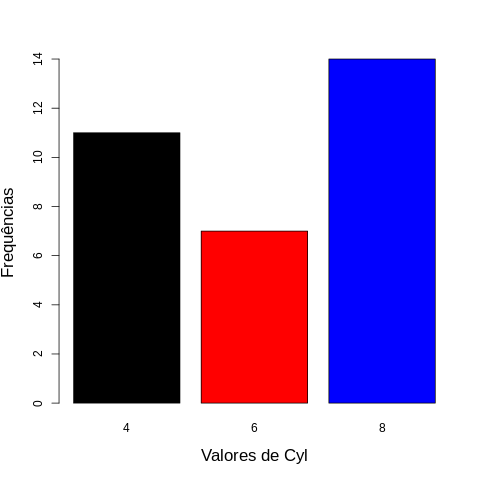

In [ ]:
%%R
barplot( table( mtcars$cyl ), xlab = "Valores de Cyl", ylab = "Frequências", cex.lab = 1.4 , col = c("black", "red", "blue") )

#### Gráfico de setores


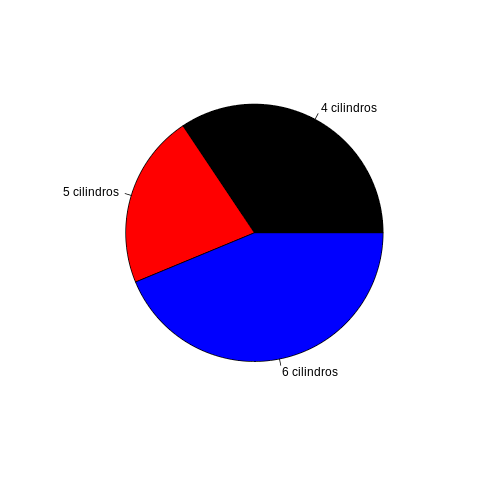

In [ ]:
%%R 
pie( table( mtcars$cyl ), col = c("black", "red", "blue"), labels = c("4 cilindros", "6 cilindros", "8 cilindros") )

In [ ]:
%%R 
# instalando pacote para pizza em 3D - executar apenas uma vez
install.packages("plotrix")



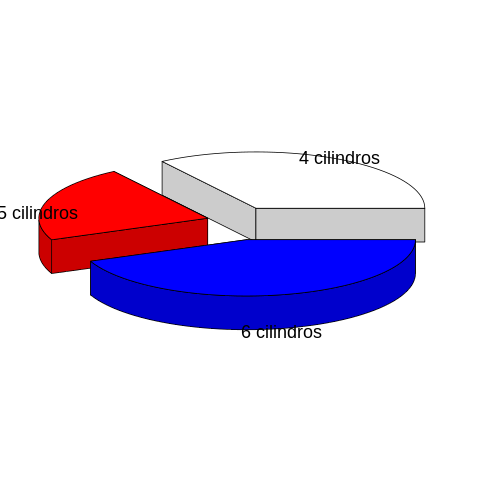

In [ ]:
%%R
library(plotrix)
pie3D( table( mtcars$cyl ), col = c("white", "red", "blue"), labels = c("4 cilindros", "6 cilindros", "8 cilindros"), explode = 0.2 )

#### Construindo a tabela de frequências 

In [ ]:
%%R
# armazenando as frequências em tabela
tf <- cbind( unique( mtcars$cyl ), table( mtcars$cyl ), prop.table( table( mtcars$cyl )), 100*prop.table( table( mtcars$cyl )))
tf

  [,1] [,2]    [,3]   [,4]
4    6   11 0.34375 34.375
6    4    7 0.21875 21.875
8    8   14 0.43750 43.750


In [ ]:
# atrbuindo nome às colunas
%%R
colnames(tf) <- c("Cyl", "Freq. Absoluta", "Freq. Relativa", "Percentuais")
tf

  Cyl Freq. Absoluta Freq. Relativa Percentuais
4   6             11        0.34375      34.375
6   4              7        0.21875      21.875
8   8             14        0.43750      43.750


#### Diagrama de caixas 

As próximas visualizações são adequadas para variáveis quantitativas contínuas com grande multiplicidade de valores. Analisaremos a variável `qsec`, ou seja, o tempo necessário para o modelo atingir um quarto de milha. 

In [ ]:
%%R
boxplot( mtcars$qsec , xlab = "", ylab = "Tempo para 1/4 de milha")

#### Histograma

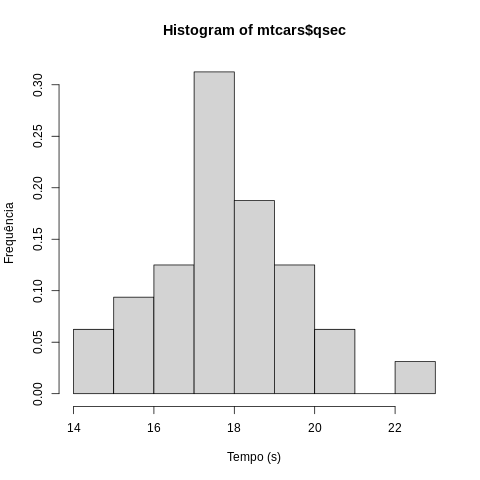

In [ ]:
%%R
hist( mtcars$qsec, xlab = "Tempo (s)", ylab = "Frequência", freq = FALSE )

#### Densidade estimada

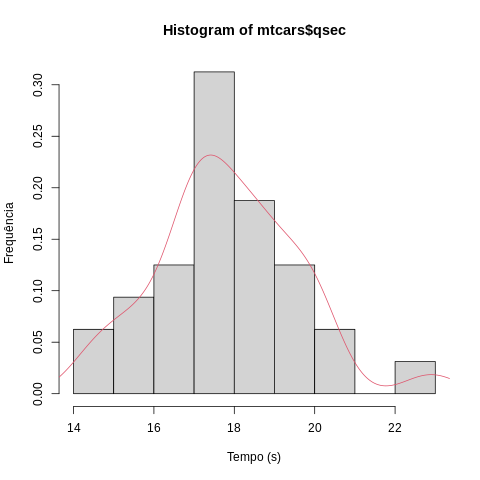

In [ ]:
%%R
hist( mtcars$qsec, xlab = "Tempo (s)", ylab = "Frequência", freq = FALSE )
lines( density( mtcars$qsec ) , col=2)

+ Uma pergunta é: há aderência à normalidade nos dados de `qsec`? 

In [ ]:
%%R
shapiro.test( mtcars$qsec )


	Shapiro-Wilk normality test

data:  mtcars$qsec
W = 0.97325, p-value = 0.5935



A resposta é sim. Os dados de `qsec` podem ser considerados como normalmente distribuídos. Dessa forma, podemos ajustar um modelo normal para representar a distribuição dos dados. 

In [ ]:
%%R
print(mean( mtcars$qsec ))
sd( mtcars$qsec ) 

[1] 17.84875
[1] 1.786943


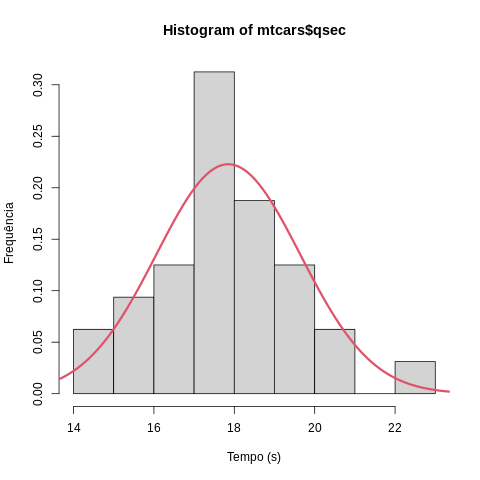

In [ ]:
%%R
t <- seq(12, 25, by = 0.1)
hist( mtcars$qsec, xlab = "Tempo (s)", ylab = "Frequência", freq = FALSE )
lines(t, dnorm(t, mean = 17.85, sd = 1.79 ) , col = 2, lwd = 3)

#### Diagrama Ramos-e-Folhas



In [ ]:
%%R
stem( mtcars$qsec )


  The decimal point is at the |

  14 | 56
  15 | 458
  16 | 5799
  17 | 00134468
  18 | 00356699
  19 | 459
  20 | 002
  21 | 
  22 | 9



### Distribuições Bivariadas

#### Tabela de contingência



In [ ]:
%%R 
table( mtcars$cyl, mtcars$am )

   
     0  1
  4  3  8
  6  4  3
  8 12  2


Na amostra, o número de cilindros e o tipo de câmbio são fatores associados? Vamos realizar o teste chi-quadrado.


In [ ]:
%%R
chisq.test( table( mtcars$cyl, mtcars$am ) )


	Pearson's Chi-squared test

data:  table(mtcars$cyl, mtcars$am)
X-squared = 8.7407, df = 2, p-value = 0.01265



Sim. Os fatores `cyl`e `am` estão associados ao nível de 5% de significância ($\chi = 8.74, ~ g.l.  = 2 , ~ P = 0.0127$)

In [ ]:
%%R 
prop.table( table( mtcars$cyl, mtcars$am ) )

   
          0       1
  4 0.09375 0.25000
  6 0.12500 0.09375
  8 0.37500 0.06250


#### Gráfico de barras


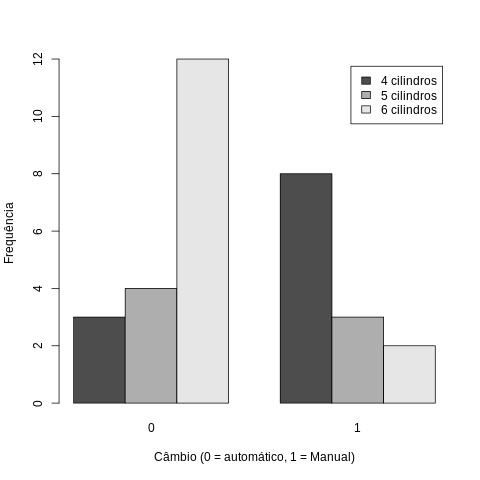

In [ ]:
%%R
barplot( table( mtcars$cyl, mtcars$am ), xlab = "Câmbio (0 = automático, 1 = Manual)", ylab = "Frequência", beside = TRUE, 
        legend = c("4 cilindros", "6 cilindros", "8 cilindros") )

#### Diagramas de caixas

Agora vamos "desdobrar" a análise, e avaliar o `qsec` em função do modelo ser automático ou manual. 

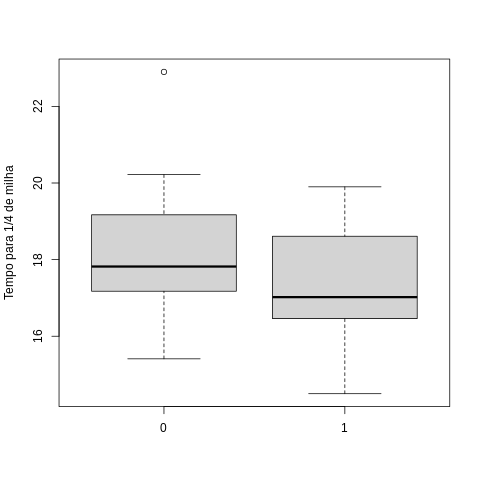

In [ ]:
%%R
boxplot( qsec ~ am, data = mtcars , xlab = "", ylab = "Tempo para 1/4 de milha")

#### Gráfico de Médias 

Qual é o tempo médio para o carro atingir um quarto de milha em função do tipo de câmbio? 

In [ ]:
%%R
medias <- tapply( mtcars$qsec, mtcars$am, mean )
print( medias )

       0        1 
18.18316 17.36000 


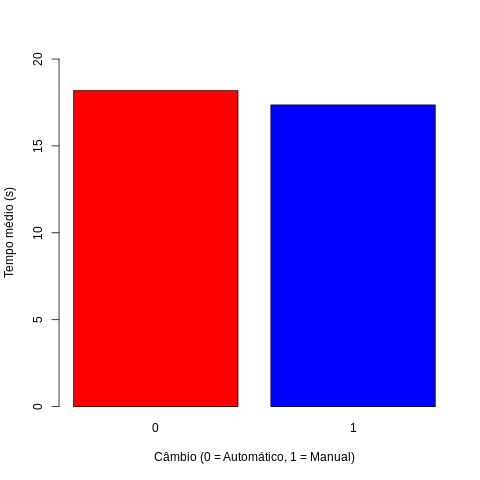

In [ ]:
%%R
barplot( medias, xlab = "Câmbio (0 = Automático, 1 = Manual)", ylab = "Tempo médio (s)", col = c("red", "blue"), ylim = c(0, 20))

Agora qual é o tempo médio para atingir 1/4 de milha em função do número de cilindros? 

In [ ]:
%%R
medias_2 <- tapply( mtcars$qsec, mtcars$cyl, mean )
print( medias_2 )

       4        6        8 
19.13727 17.97714 16.77214 


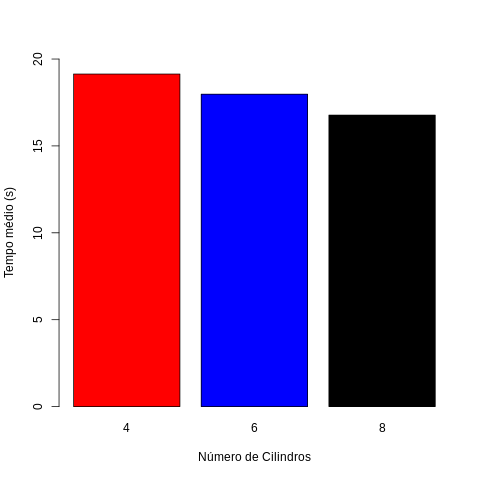

In [ ]:
%%R
barplot( medias_2, xlab = "Número de Cilindros", ylab = "Tempo médio (s)", col = c("red", "blue","black"), ylim = c(0, 20))

#### Diagrama de Dispersão

Nesta etapa iremos avaliar o relacionamento de duas variáveis quantitativas contínuas (`qsec` e `hp`). 

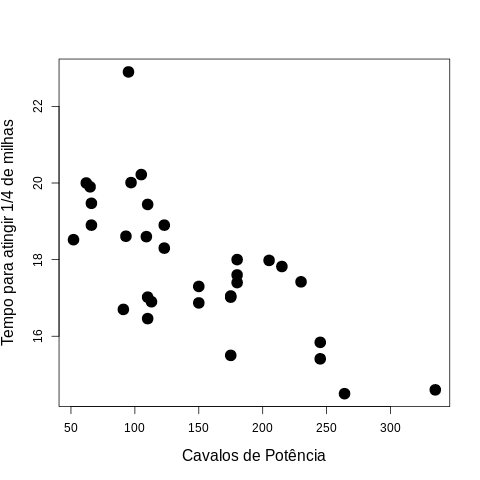

In [ ]:
%%R
plot( qsec ~ hp, data = mtcars, ylab = "Tempo para atingir 1/4 de milhas", xlab = "Cavalos de Potência", cex.lab = 1.3, cex = 2, pch = 19)

### **Desafios**

<details>
<summary> Desafio 1 </summary>
Construa um gráfico de barras para visualizar a distribuição da variável `am` (tipo de câmbio) em percentuais. Adicione rótulos dos eixos `x` e `y` e cores. Altere também o tamanho dos caracteres nos rótulos.
</details>


<details>
<summary> Desafio 2 </summary>
Carregue o banco de dados de nome `iris` e inspecione as variáveis existentes. Quantas variáveis são quantitativas? E qualitativas? Como acessar apenas a coluna com os nomes das espécies? 
</details>


<details>
<summary> Desafio 3 </summary>
Imprima as linhas 2, 3, 6, 7, e 10 do banco de dados `mtcars` excluindo a quarta coluna. 
</details>

<details>
<summary> Desafio 4 </summary>
Calcule a média, a variância e o desvio-padrão da variável `qsec`, do objeto `mtcars`. (Dica: consulte o notebook da aula passada sobre "Introdução ao R")
</details>











